In [34]:
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

full_matches_train_data = pd.read_csv('../data/processed/full_matches_train_data.csv')

# Features (colunas que serão utilizadas para fazer a previsão)
X = full_matches_train_data.drop(['teamOneWon', 'teamTwoWon'], axis=1)
X = X.apply(pd.to_numeric, errors='coerce')

# Target (coluna que será prevista)
y = full_matches_train_data['teamOneWon']
y = y.apply(pd.to_numeric, errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciar um modelo XGBoost
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo de XGBoost: {accuracy:.2f}')
print(f"Score do modelo de XGBoost: {model.score(X_test, y_test)}")

# Relatório de classificação
print(classification_report(y_test, y_pred))

Acurácia do Modelo de XGBoost: 0.70
Score do modelo de XGBoost: 0.7
              precision    recall  f1-score   support

       False       0.76      0.72      0.74        54
        True       0.62      0.67      0.64        36

    accuracy                           0.70        90
   macro avg       0.69      0.69      0.69        90
weighted avg       0.70      0.70      0.70        90



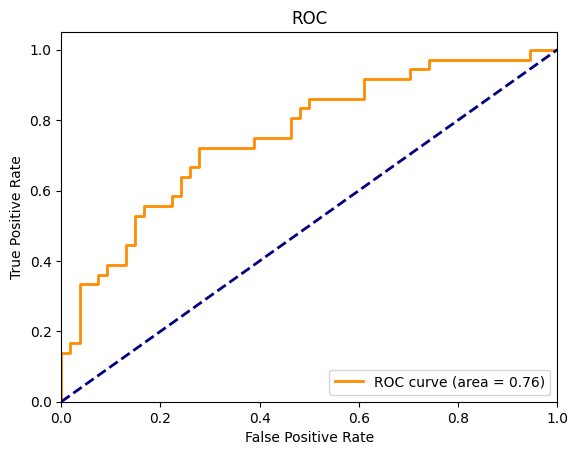

In [35]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()